In [89]:
import pandas as pd
import json
from pandas import json_normalize

# Load the JSON data efficiently
with open('/Users/trsaivarun/Downloads/response.json', 'r') as f:
    data = json.load(f)

# Normalize and flatten the JSON structure
df = json_normalize(
    data['notices'],
    record_path=['works', 'infringing_urls'],
    meta=[
        'id', 
        'type', 
        'title', 
        'date_sent', 
        'date_received', 
        ['works', 'description']
    ],
    record_prefix='infringing_'
)

# Rename columns directly during DataFrame creation for efficiency
df.columns = df.columns.str.replace('infringing_url', 'infringing URL').str.replace('works.description', 'work_description')

# Save the flattened data to CSV
df.to_csv('/Users/trsaivarun/Desktop/c_py:R/test-speeds/flattened_json_data_python.csv', index=False)


/var/folders/7q/0gg0m0p10rxdfsk92_gytn080000gn/T/ipykernel_52748/2704993500.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('infringing_url', 'infringing URL').str.replace('works.description', 'work_description')


In [90]:
import socket
from urllib.parse import urlparse
import pandas as pd
from gevent import monkey # using gevent to speedup process
from gevent.pool import Pool

# Apply gevent monkey patching to enable asynchronous networking
monkey.patch_all()

# Function to extract domain from a URL
def extract_domain(url):
    try:
        return urlparse(url).netloc
    except Exception as e:
        return None

# Function to get IP address for a domain
def get_ip(domain):
    try:
        return socket.gethostbyname(domain)
    except socket.gaierror:
        return None

# Load your DataFrame (assuming it's already loaded as df)

# Extract domain from infringing URLs
df['domain'] = df['infringing URL'].apply(extract_domain)

# Set up a gevent pool with a suitable number of workers (adjust based on your CPU)
pool = Pool(100)  # You can adjust the pool size based on your system's capability

# Use gevent pool to asynchronously resolve IPs
df['IP address'] = pool.map(get_ip, df['domain'])

# Save the updated DataFrame to CSV
df.to_csv('/Users/trsaivarun/Desktop/c_py:R/test-speeds/flattened_json_data_with_ip_python.csv', index=False)


In [91]:
#approx 2min 

In [92]:
df.isna().sum()

infringing URL         0
id                     0
type                   0
title                  0
date_sent              0
date_received          0
work_description       0
domain                 0
IP address          3427
dtype: int64

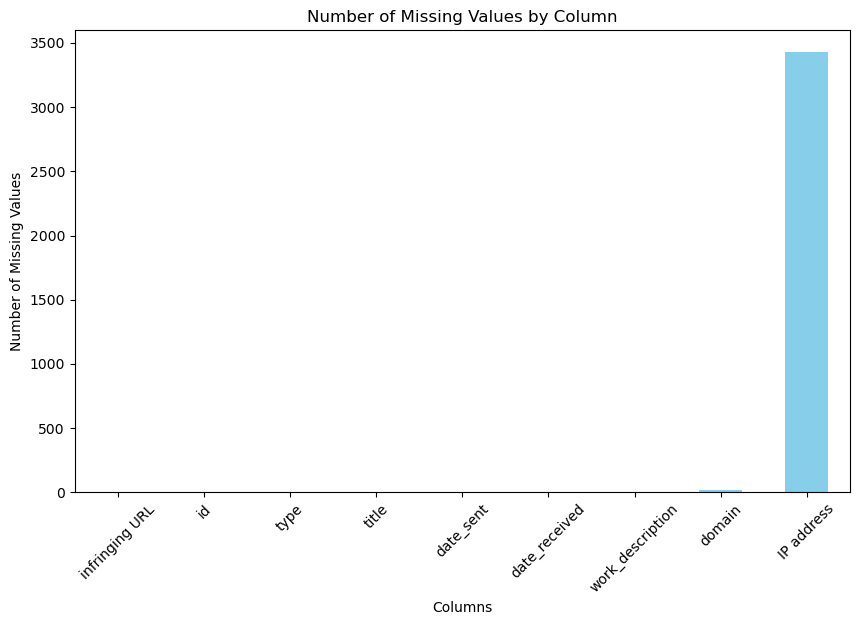

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with the IP addresses and domains
df = pd.read_csv('/Users/trsaivarun/Desktop/c_py:R/test-speeds/flattened_json_data_with_ip_python.csv')

# Count missing values for each column
missing_counts = df.isna().sum()

# Plot bar chart
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values by Column')
plt.xticks(rotation=45)
plt.show()


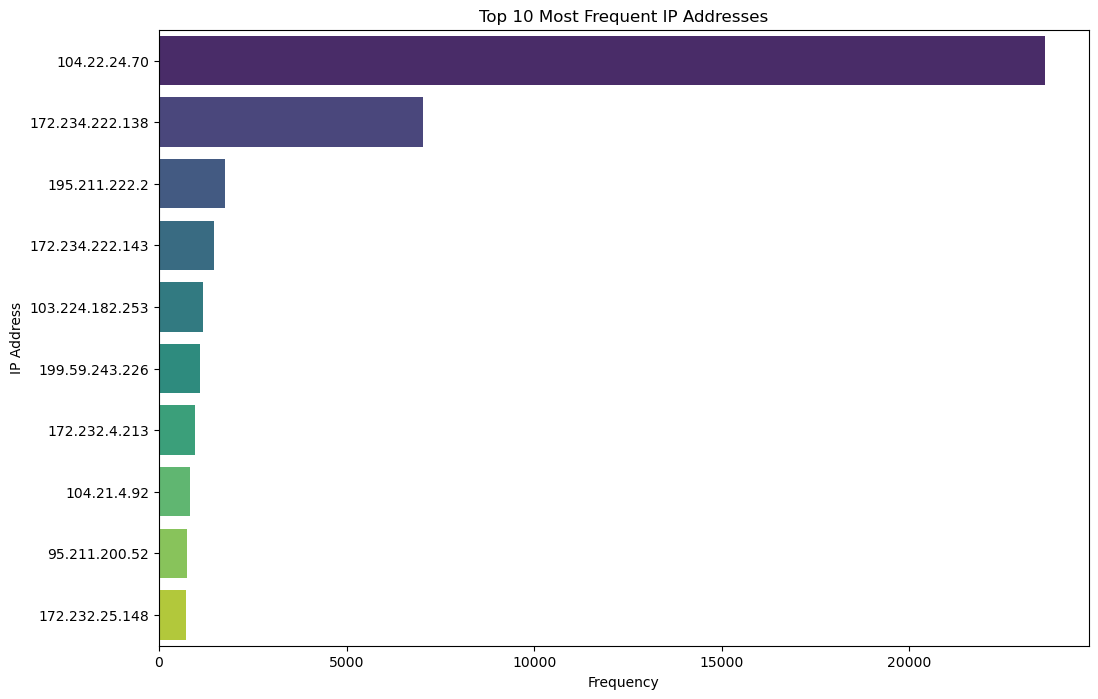

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count the frequency of each IP address
ip_counts = df['IP address'].value_counts()

# Get the top 10 most frequent IP addresses
top_ip_addresses = ip_counts.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_ip_addresses.values, y=top_ip_addresses.index, palette='viridis')

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('IP Address')
plt.title('Top 10 Most Frequent IP Addresses')
plt.show()


In [95]:
df['infringing URL'].value_counts().head(10)

No URL submitted                                                     19
https://drive.google.com/file/d/1tqRi2DiMjmeb_1KidMMcglWNEiJI4GIt     2
https://drive.google.com/file/d/1TJekGwVHJxoSSbgPzf3WV53DFx4yic2Y     2
https://drive.google.com/file/d/1tibAet-OUlazYuUOh0tFOtQfQr3X-7W8     2
https://drive.google.com/file/d/1SIr1jOKgD26TBRo7uOnCXHRTVJ6l8jG0     2
https://drive.google.com/file/d/1rv-89CQwtAv5nGT3tu9ZGYV48cknkvyo     2
https://drive.google.com/file/d/1RGbzMLTQw4zgy7YPjt15Qi8Seh7NSEHY     2
https://drive.google.com/file/d/1qMqeDOW5dGz1wnXZybp_f8Nf3u1hbtsf     2
https://drive.google.com/file/d/1qL3zla1W-PWkQEr0G7oS6ca3L1xF5i1W     2
https://drive.google.com/file/d/1QGMMbqy63N8KBdskK9DP-YIR2E8_9VsJ     2
Name: infringing URL, dtype: int64

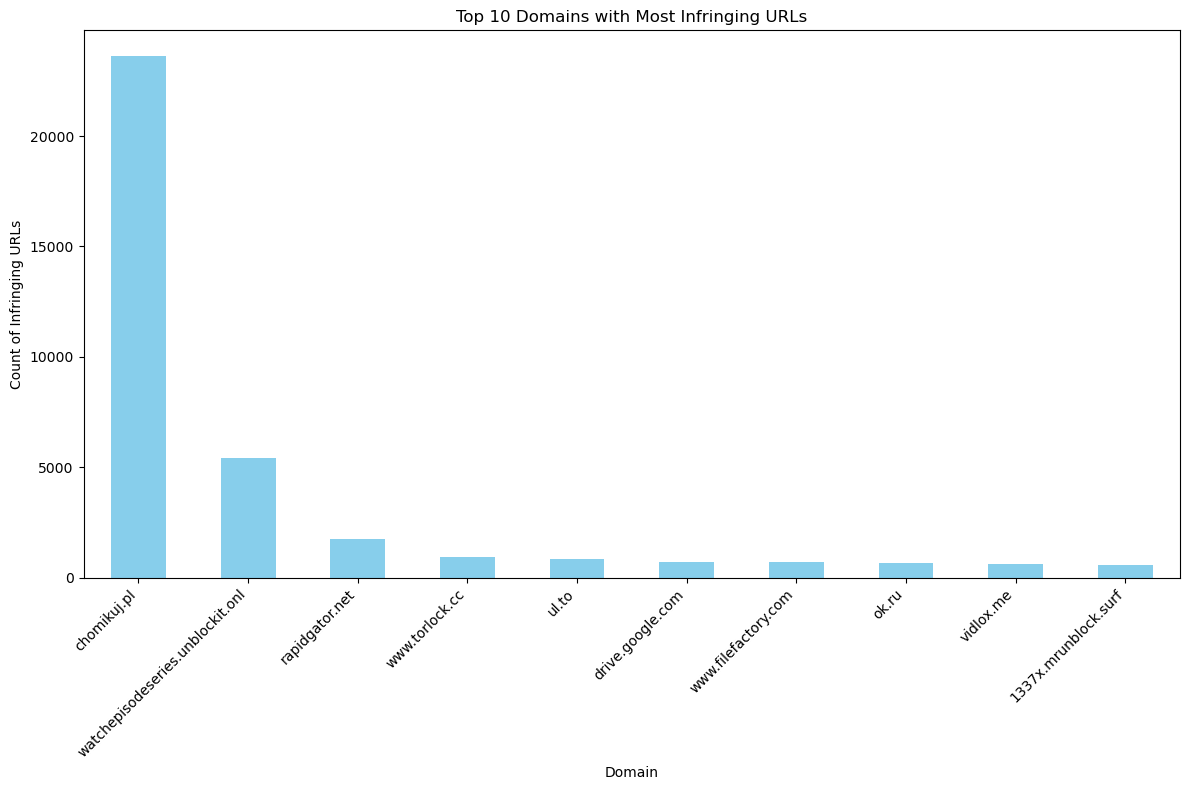

In [96]:
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/trsaivarun/Desktop/c_py:R/test-speeds/flattened_json_data_with_ip_python.csv')

# Count of infringing URLs per domain
domain_counts = df['domain'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
domain_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Domains with Most Infringing URLs')
plt.xlabel('Domain')
plt.ylabel('Count of Infringing URLs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_domains.png')
plt.show()

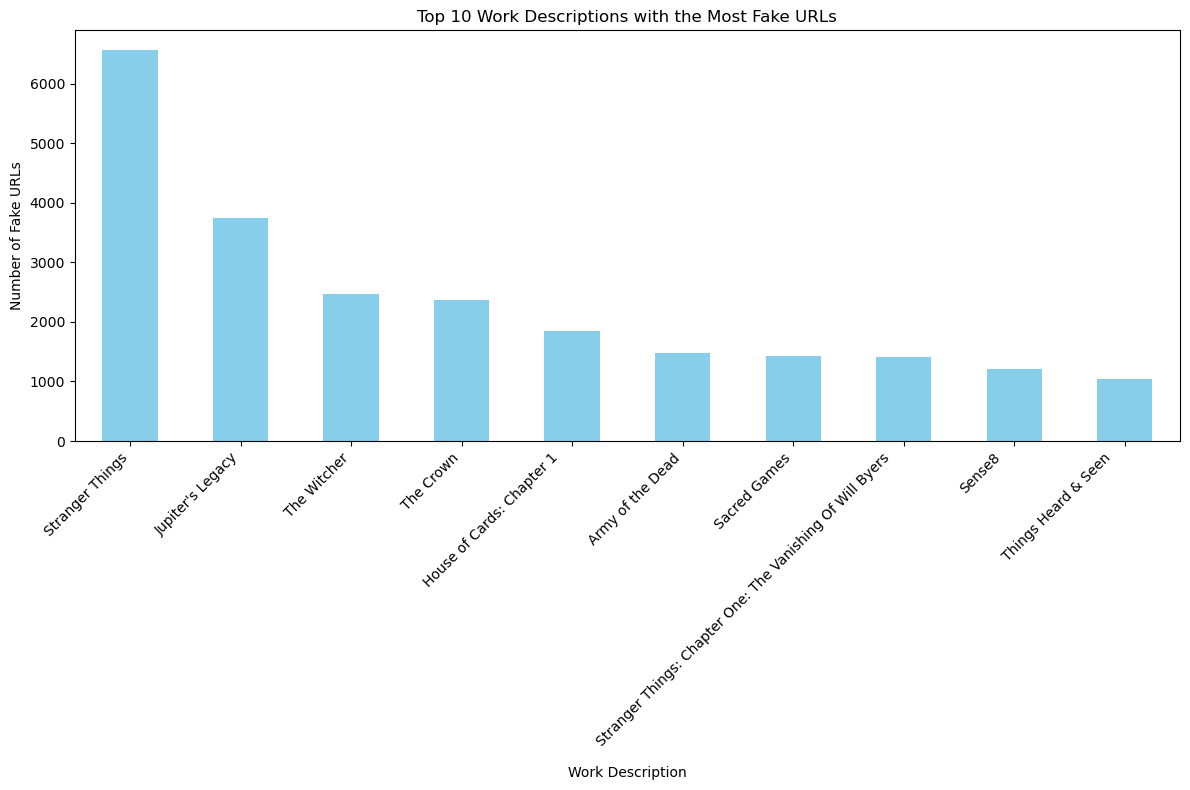

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each work_description
description_counts = df['work_description'].value_counts()

# Get the top 10 most frequent work_descriptions
top_10_descriptions = description_counts.head(10)

# Set font to handle special characters
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot the top 10 results
plt.figure(figsize=(12, 8))  # Adjust the size to accommodate longer labels
top_10_descriptions.plot(kind='bar', color='skyblue')
plt.title('Top 10 Work Descriptions with the Most Fake URLs')
plt.xlabel('Work Description')
plt.ylabel('Number of Fake URLs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()